### Submitted by Kumar Apurva 2K18/MC/058 and Madhuresh Mayank 2K18/MC/062

# Relative Strength Index (RSI) Indicator programming

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## 1. Data reading from file

In [2]:
DATA_FILE_PATH = "apple.csv"
TIMESTAMP_NAME = "Date" # timestamp name from .csv
PRICE_NAME = "Close" # define price name that will be used from .csv
df = pd.read_csv(DATA_FILE_PATH, sep=',')

## 2. Calculating RSI indicator

In [3]:
### How to understand this indicator
# Wilder recommended using 70 and 30 as overbought and oversold levels respectively. Generally,
# if the RSI rises above 30 it is considered bullish for the underlying stock. Conversely,
# if the RSI falls below 70, it is a bearish signal. Some traders identify the long-term t
# rend and then use extreme readings for entry points. If the long-term trend is bullish,
# then oversold readings could mark potential entry points.

rsi_length = 14 #here define RSI lenght
next_df = df[PRICE_NAME].shift(1)
next_df[0] = 0 #change the very first array value from 'nan' to 0
change = df[PRICE_NAME] - next_df


# gain and loss array:
gain = []
loss = []
for i in change:
    if (i > 0):
        gain.append(i)
        loss.append(0)
    else:
        loss.append(i)
        gain.append(0)


# fill first avg_gain and avg_loss with None for graph
avg_gain = []
avg_loss = []
RSI = []
for i in range(rsi_length):
    RSI.append(None)
    avg_gain.append(None)
    avg_loss.append(None)


# calculate first_avg_gain and first_avg_loss, add them to avg_gain, avg_loss
first_avg_gain =  sum(gain [1:rsi_length]) / rsi_length
first_avg_loss = sum(loss [1:rsi_length]) / rsi_length

avg_gain.append(first_avg_gain)
avg_loss.append(first_avg_loss)

# calculate all other avg_gains and avg_loss
for i in range(rsi_length, df[PRICE_NAME].size):
    temp_gain = (avg_gain[i] * (rsi_length - 1) + gain[i]) / rsi_length
    avg_gain.append(temp_gain)
    temp_loss = (avg_loss[i] * (rsi_length - 1) + loss[i]) / rsi_length
    avg_loss.append(temp_loss)


# RSI calculations
for i in range (rsi_length, df[PRICE_NAME].size):
    RS = abs(avg_gain[i] / avg_loss[i])
    temp_RSI = 100 - (100 / (1 + RS))
    RSI.append(temp_RSI)


## 3. Show historic price data in first subplot and RSI on other

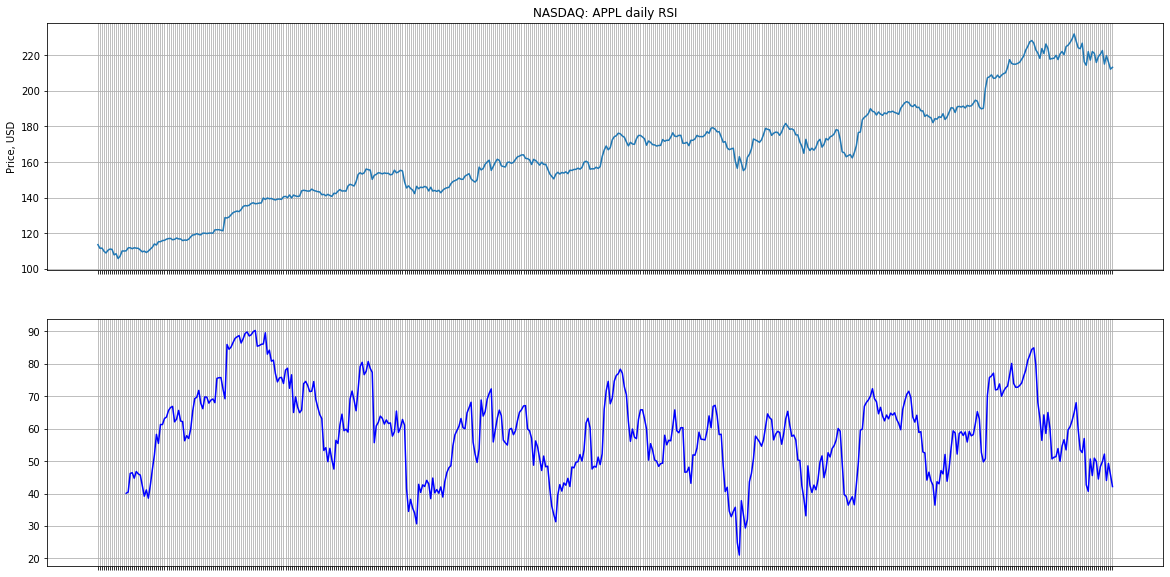

In [4]:
plt.figure(figsize=(20,10)) # change default figure size
ax1 = plt.subplot(2, 1, 1)
plt.plot(df[TIMESTAMP_NAME], df[PRICE_NAME])
plt.title("NASDAQ: APPL daily RSI")
plt.ylabel("Price, USD")
plt.grid()
frame1 = plt.gca() # hide x axis values
frame1.axes.xaxis.set_ticklabels([])

# add data to another subplot
x2 = plt.subplot(2, 1, 2, sharex = ax1)
plt.plot(RSI, color = 'blue')
plt.grid()